# P5 Vorlage: Statistik und Visualisierung mit Pandas


In diesem Versuch soll alles bisher gelernte angewandt und erweitert werden. Zudem sollen einige Pandas-Funktionen zur Berechnung statistischer Kennzahlen und zur grafischen Visualisierung vorgestellt werden. 

Python Pakete einbinden:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

# Statistische Kennzahlen mit Pandas

Sie sog. Lageparameter geben an, wo sich der größte Teil einer Stichprobe befindet. Sie werden auch als Maß der zentralen Tendenz bezeichnet.

## Beispiel: Lageparameter zu Bevölkerung und Verbrechen in den USA

Laden wir die Daten in einen pandas DataFrame und lassen uns den Inhalt anzeigen. Die Datei state.csv steht Ihnen auf Moodle zur Verfügung.

In [2]:
state = pd.read_csv('state.csv')
state.head(8)          # Ein paar Werte ausgeben

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### Wie groß ist Bevölkerungsanzahl in den Staaten der USA im Mittel?

Gängige Lageparameter um Antworten auf diese Frage zu erhalten sind:
* das arthmetische Mittel (= Durchschnitt)
* der Median (= der mittlere Wert)

`mean` und `median` können mit den pandas Methoden für DataFrames berechnet werden. 

<u>Tipp:</u> Statt der Numpy-Aggregatsfionktionen (z.B. np.mean()) kann auch komfortabel auf die Aggregatsfunktionen der Pandas-Bibliothek zurückgegriffen werden.

In [3]:
state['Population'].mean()

6162876.3

Ein Bundesstaat hat also im Mittel ca. 6 Mio Einwohner. Lassen wir uns zusätzlich die Extremwerte anzeigen.

In [4]:
state['Population'].max()

37253956

In [5]:
state['Population'].min()

563626

Welcher Staat hat die kleinste Bevölkerungsanzahl?

In [6]:
# Ermitteln des Index des Minimums:
state['Population'].idxmin()

49

In [7]:
# Verwendung dieses Index zur Adressierung:
state.iloc[49,:]

State           Wyoming
Population       563626
Murder.Rate         2.7
Abbreviation         WY
Name: 49, dtype: object

In [8]:
# Alternative in einer einzigen Codezeile:
state.iloc[state['Population'].idxmin()]

State           Wyoming
Population       563626
Murder.Rate         2.7
Abbreviation         WY
Name: 49, dtype: object

Der Datensatz der Bevölkerungszahlen der einzelnen US-Bundesstaaten streut stark, wie wir anhand des Minimal- und Maxiamlwertes sehen können. Wir müssen also mit vielen statistischen Ausreißern rechnen, weswegen der arithmetische Mittelwert kein gutes Maß zur Beschreibung eines durchschnittlichen Bundessaats ist. Anders beim Median: Hier wird die Reihe sortiert (in diesem Fall nach Bevölkerungsanzahl) und der Wert selektiert, der genau in der Mitte liegt. 

In [9]:
state['Population'].median()

4436369.5

Führen wir nun einige Berechnungen mit der Mordrate durch.

In [10]:
state['Murder.Rate'].mean()


4.066

In [11]:
state['Murder.Rate'].median()


4.0

Anders als bei der Bevölkerungszahl sind die Unterschiede zwischen arithmetischem Mittelwert und Median bei der Mordrate klein. Dies liegt insbesondere daran, dass im Datensatz die Mordrate in der Form "Morde pro 100.000 Einwohner" und damit bereits normiert auf die Bevölkerungszahl vorliegt. 

 ### Aufgabe

Ermitteln Sie die minimale und maximale Mordrate sowie die Bundesstaaten in denen diese vorkommen. 

# Streuungsparameter

In [12]:
# Zunächst nochmal den Datenbestand begutachten:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


## Die Standardabweichung

Wiederholung: Die Standardabweichung beschreibt, wie weit die gemessenen Werte im Schnitt vom Durchschnitt (genauer: vom arithmetischen Mittel) abweichen. 

D.h. für jeden Wert wird die Differenz zum Mittelwert gebildet. Diese Differenzen werden quadriert (um zu vermeiden, dass sich positive und negative Differenzen ausgleichen) und aufsummiert und anschließend durch die Anzahl der Messungen -1 geteilt. Als Ergebnis erhalten wir die sogenannte Varianz. Die Quadratwurzel aus diesem Wert ist die Standardabweichung.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/96319e4ec5a4317a943c96b8a6408e71923fcc2c)

In [13]:
state['Murder.Rate'].std()

1.915736124302923

Für unser Beispiel bedeutet dies vereinfacht, dass die Mordrate der einzelnen Bundestaaten im Mittel um 1.9 Morde vom Durchschnitt abweicht.

Der Interquartilabstand IQA (bzw. IQR) wird als Differenz zwischen den 75% und 25% Quantil berechnet. Das Ergebnis beschreibt die Breite des Korridors, in dem die mittleren 50% der Stichprobe liegen.  

In [14]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

## Perzentile and Boxplots
_Pandas_ bietet die Methode `quantile` für DataFrames an. Damit können flexibel verschiedenste Quantile ermittelt werden.

In [15]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [16]:
# Dasselbe nochmal, aber mit schönerer Darstellung:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


_Pandas_ bietet ein Auswahl an Visualisierungen für die explorative Analyse, z.B. Boxplots.

Ein Boxplot hat eine Box, die sich vom 25% bis zum 75 % Quantil erstreckt. 

Die Enden (auch Antennen oder Whisker gennant) ober- und unterhalb der Box repräsentieren das Maximum und das Minimum der Stichprobe, der Strich in der Mitte der Box zeigt den Median.

Werte die mehr als das 1,5-fache des IQA von der Box abweichen werden als Ausreißer mit Kreisen gekennzeichnet. 
Werte die mehr als das 3-fache des IQA betragen werden als Extremwerte bezeichnet und i.d.R. mit "x" gekennzeichnet. Beim Standard Boxplot von _pandas_ ist dies jedoch nicht vorgesehen.

Text(0, 0.5, 'Population (millions)')

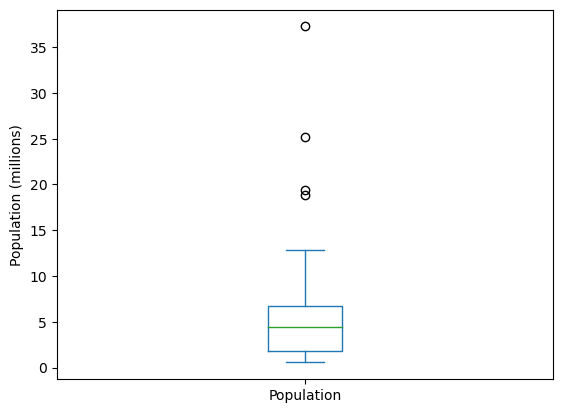

In [17]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

## Häufigkeitsverteilungen und Histogramme
Die Methode `cut` in _pandas_ unterteilt Daten in Werteklassen. 

Der folgende Code erzeugt 10 gleich große Klassen aus den Bevölkerungsdaten der Staaten. Die Methode `value_counts` zeigt die Häufigkeiten für die einzelnen Klassen.

In [18]:
binnedPopulation = pd.cut(state['Population'], 10)

In [19]:
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

<u>Info:</u> Der gesamte denkbare Wertebereich der Bevölkerungszahlen wird hier in zehn gleich große Teile unterteilt. binnedPopulation gibt nun für jeden der 50 Staaten an, in welche Werteklasse die Bevölkerungszahl des jeweiligen Staates fällt. Bspw. fällt Staat Nummer 0 in die Werteklasse zwischen 4232659 und 7901692 Einwohnern.

Nun soll ermittelt werden, wie oft jede Werteklasse im Datenbestand vorkommt: 

In [20]:
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Nun soll diese neue Information (also welcher Staat in welche Werteklasse einzuordnen ist) in den Datenbestand mit aufgenommen. Hierzu wird die Series `binnedPopulation` mit dem bisherigen DataFrame state per `concat()` verknüpft. 

In [21]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)  # axis=1, d.h. einen neue Spalte einfügen
df = df.sort_values(by='Population')    # Den (neuen) Datensatz nach der Bevölkerungszahl sortieren
df

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"
7,Delaware,897934,5.8,DE,"(526935.67, 4232659.0]"
25,Montana,989415,3.6,MT,"(526935.67, 4232659.0]"
38,Rhode Island,1052567,2.4,RI,"(526935.67, 4232659.0]"
28,New Hampshire,1316470,0.9,NH,"(526935.67, 4232659.0]"
18,Maine,1328361,1.6,ME,"(526935.67, 4232659.0]"


_Pandas_ unterstützt auch die schnelle Erzeugung von Histogrammen. So kann schnell eine Häufigkeitsverteilung in einer Stichprobe sichtbar gemacht werden. Standardmäßig werden zehn Klassen gebildet, dies lässt sich aber über die Parameter `bins` von `hist()` auch ändern.

Text(0.5, 0, 'Population (millions)')

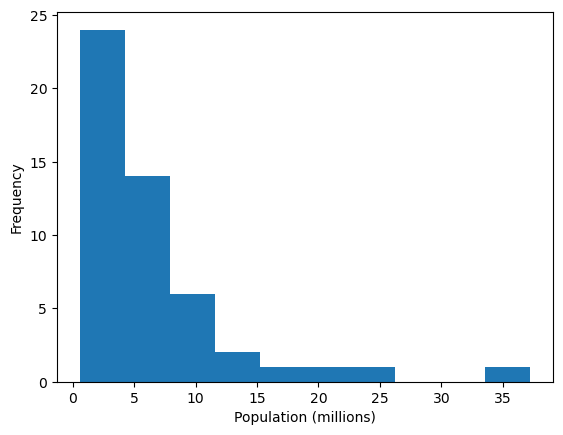

In [22]:
ax = (state['Population'] / 1000000).plot.hist(bins=10)
ax.set_xlabel('Population (millions)')

## Dichteschätzer
Der Einsatz eines (Kern-)dichteschätzers ermöglicht eine genauere weil stetige Einschätzung der Verteilung der der Daten. Der Parameter `bw_method` steuert die Glättung der Kurve.
Siehe auch: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html

<AxesSubplot:ylabel='Density'>

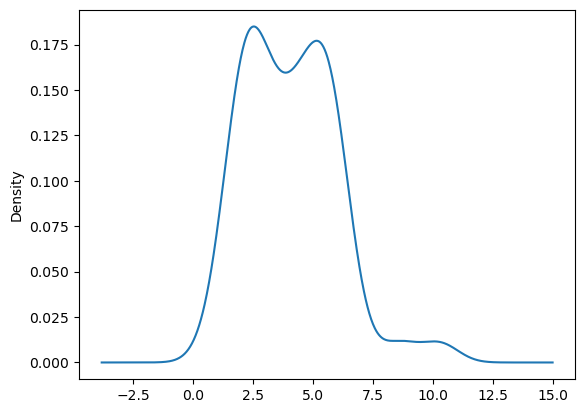

In [23]:
state['Murder.Rate'].plot.density(bw_method=0.4)

# Tipp: Spielen Sie mit dem Glättungsparameter bw_method und schauen Sie, wie sich das Ergebnis ändert. 


Histogramm und Dichteschätzer können auch in einer Visualisierung zusammen angezeigt werden, wie nachfolgend für die Mordrate dargestellt. Hierzu bietet es sich an, beim Historgramm den Parameter `density=True` zu setzen, mit der Folge, dass im Histogramm auf der y-Achse nicht die absoluten Werte, sondern (wie beim Dichteschätzer) normierte Werte dargestellt werden.

Text(0.5, 24.0, 'Murder Rate (per 100,000)')

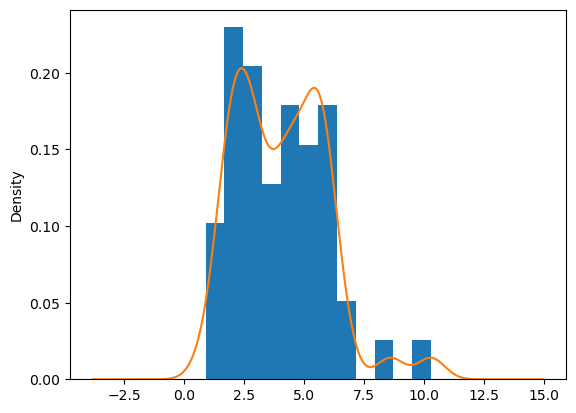

In [24]:
my_plot = (state['Murder.Rate']).plot.hist(bins=12, density=True)
my_plot = state['Murder.Rate'].plot.density(bw_method=0.3)
my_plot.set_xlabel('Murder Rate (per 100,000)')